In [4]:
from backprop.core import Value

# do both brew install and pip install
from graphviz import Digraph

In [5]:

# get all nodes and edges
def trace(out):
    nodes, edges = set(), set()

    # define a recursive function
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v)) # edge is a tuple
                build(child)
    build(out)
    return nodes, edges


def draw(out):
    nodes, edges = trace(out)

    graph = Digraph(format='svg')

    for n in nodes:
        graph.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')

        if n._op:
            graph.node(name=str(id(n))+n._op, label = n._op)
            graph.edge(str(id(n))+n._op, str(id(n)))

    for n1, n2 in edges:
        graph.edge(str(id(n1)), str(id(n2))+n2._op)

    return graph

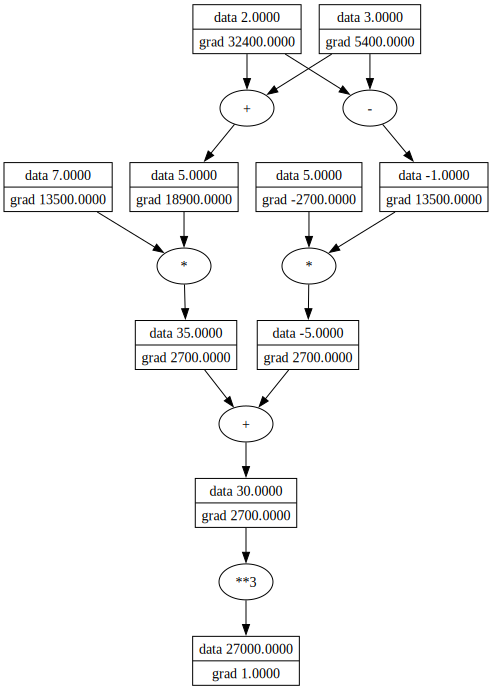

In [6]:
a = Value(2.0)
b = Value(3.0)
c = a + b
d = a - b
e = Value(7.0)*c + Value(5.0)*d
f = e**3

# now we want a way to call out.backward() such that
# all gradients are updated
# not to be confused with _backward() which is per node only
f.backward()
draw(f)